## GROUP 21
- Sai Phani Ram Popuri : **2205577**
- Sandeep Potla : **2151524**
- Sai Suma Podila : **2149229**
- Manivardhan Reddy Pidugu : **2146807**

### Importing essential libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error 

from sklearn.neighbors import KNeighborsRegressor

import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

### Reading the dataset

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
df = pd.read_csv(url, header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.columns = ["Sex", "Length", "Diameter", "Height", "Whole weight", 
              "Shuckedweight", "Viscera weight", "Shell weight", "Rings"]

In [5]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shuckedweight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Obtaining statistical parameters

In [6]:
df.describe()

,Length,Diameter,Height,Whole weight,Shuckedweight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shuckedweight     float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [8]:
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [9]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [10]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shuckedweight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [11]:
df.shape

(4177, 9)

### Check for null values
    - No null values found in the dataset.

In [12]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shuckedweight     0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<AxesSubplot: >

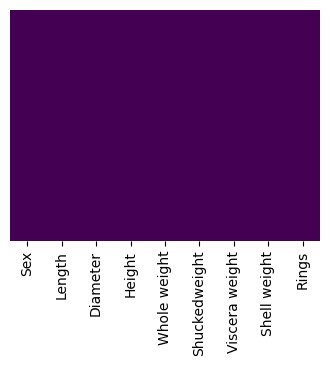

In [13]:
plt.figure(figsize=(4, 3))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [14]:
numerical_features = df.select_dtypes(include=[np.number]).columns
categorical_features = df.select_dtypes(include=[np.object]).columns

### Correlation between the variables
    - Below correlation matrix indicates the relation between the predictor variables with that of the target variable.
    - It has been observed that the features ['Shell Weight', 'Diameter', 'Height', 'Length'] has higher influence on the outcome when compared to the rest.

<AxesSubplot: >

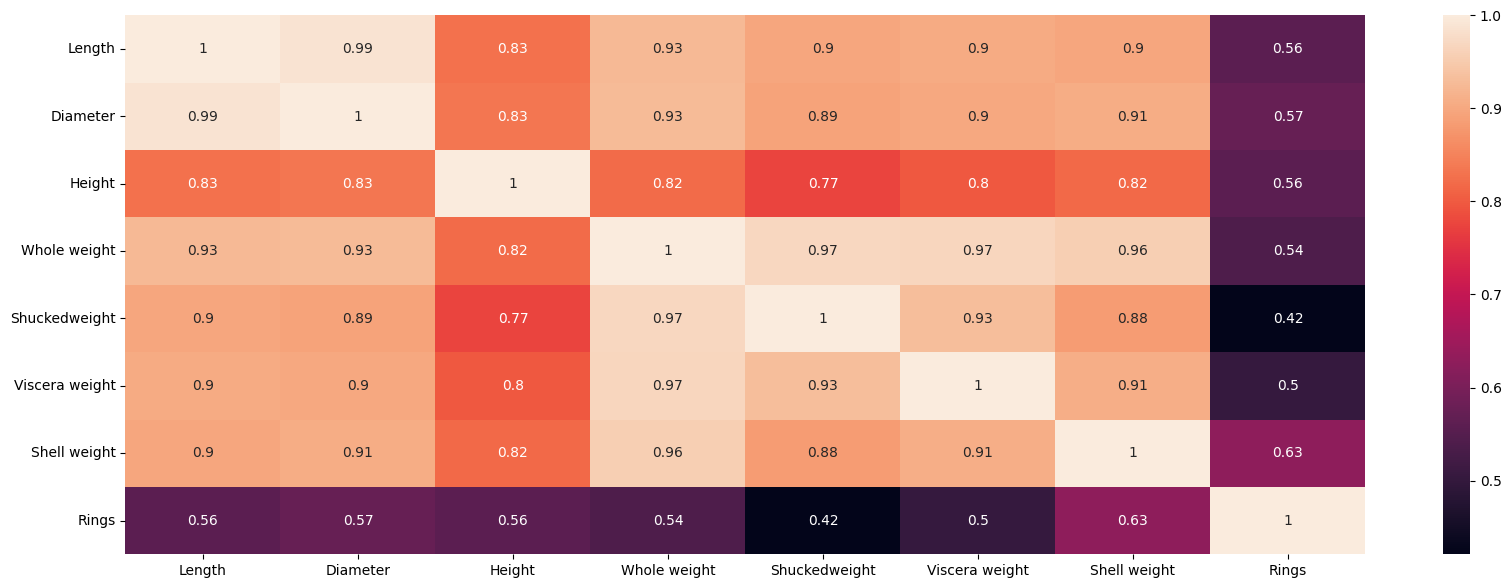

In [15]:
plt.figure(figsize=(20,7))
sns.heatmap(df[numerical_features].corr(), annot=True)

### One-hot encoding of the 'Sex' column
    - To handle the categorical column, here we have chosen 'One-hot Encoding' over 'Label Encoding'. This is because the feature 'Sex' does not translate any order in the data.

In [16]:
df = pd.get_dummies(df, columns = ['Sex'])
print(df)

      Length  Diameter  Height  Whole weight  Shuckedweight  Viscera weight  \
0      0.455     0.365   0.095        0.5140         0.2245          0.1010   
1      0.350     0.265   0.090        0.2255         0.0995          0.0485   
2      0.530     0.420   0.135        0.6770         0.2565          0.1415   
3      0.440     0.365   0.125        0.5160         0.2155          0.1140   
4      0.330     0.255   0.080        0.2050         0.0895          0.0395   
...      ...       ...     ...           ...            ...             ...   
4172   0.565     0.450   0.165        0.8870         0.3700          0.2390   
4173   0.590     0.440   0.135        0.9660         0.4390          0.2145   
4174   0.600     0.475   0.205        1.1760         0.5255          0.2875   
4175   0.625     0.485   0.150        1.0945         0.5310          0.2610   
4176   0.710     0.555   0.195        1.9485         0.9455          0.3765   

      Shell weight  Rings  Sex_F  Sex_I  Sex_M  
0 

In [17]:
df.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shuckedweight',
       'Viscera weight', 'Shell weight', 'Rings', 'Sex_F', 'Sex_I', 'Sex_M'],
      dtype='object')

### Check for outliers using the box plots

<AxesSubplot: >

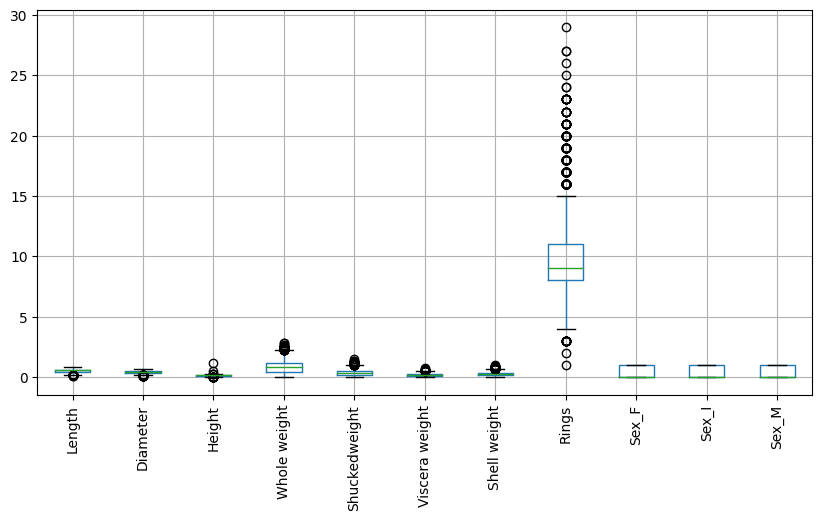

In [18]:
df.boxplot(rot = 90, figsize=(10, 5))

In [19]:
### Separating the predictor and target variables

In [20]:
y = df['Rings']
df = df.drop(columns=['Rings'], axis=1)
X = df.iloc[:, 0:10]

In [21]:
X.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shuckedweight',
       'Viscera weight', 'Shell weight', 'Sex_F', 'Sex_I', 'Sex_M'],
      dtype='object')

### Checking the distribution of features
    - It has been seen from the feature distributions that most of the predictor variables are skewed and not in line with that of Normal distribution.
    - It is due to the presence of outliers.

array([[<AxesSubplot: title={'center': 'Length'}>,
        <AxesSubplot: title={'center': 'Diameter'}>,
        <AxesSubplot: title={'center': 'Height'}>],
       [<AxesSubplot: title={'center': 'Whole weight'}>,
        <AxesSubplot: title={'center': 'Shuckedweight'}>,
        <AxesSubplot: title={'center': 'Viscera weight'}>],
       [<AxesSubplot: title={'center': 'Shell weight'}>,
        <AxesSubplot: title={'center': 'Sex_F'}>,
        <AxesSubplot: title={'center': 'Sex_I'}>],
       [<AxesSubplot: title={'center': 'Sex_M'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

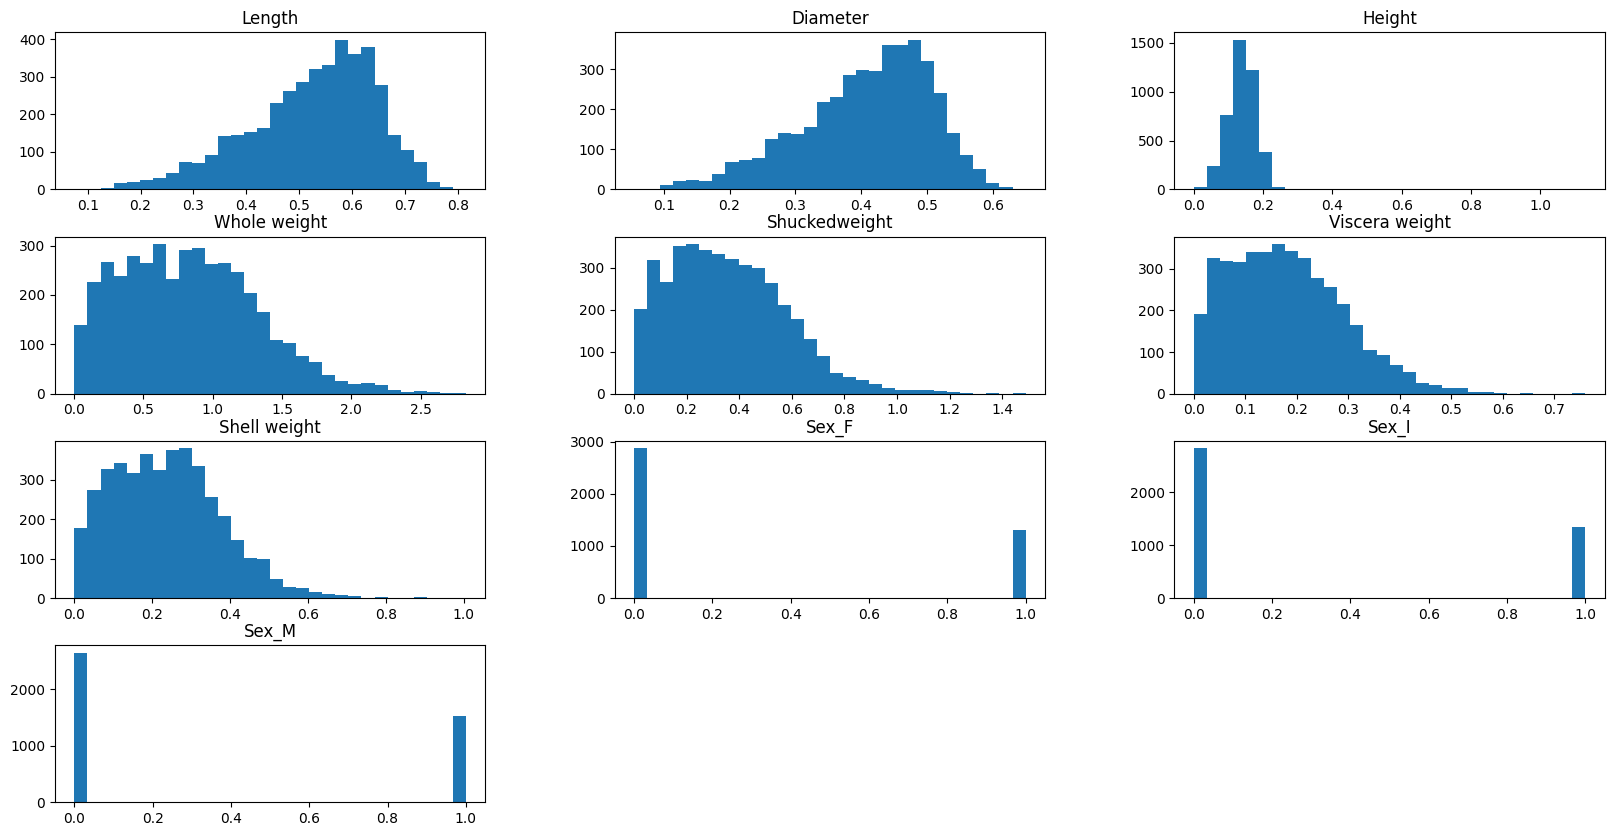

In [22]:
df.hist(figsize=(20, 10), grid = False, bins = 30)

### Function that returns outlier indices

In [23]:
def outliers(df, feature):
    
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lowerBound = Q1 - 1.5*IQR
    upperBound = Q3 + 1.5*IQR

    outlier_indices = df.index[(df[feature] < lowerBound) | (df[feature] > upperBound)]

    return outlier_indices

### Function that replaces outliers with median values

In [24]:
def replace_outliers(df, feature, outlier_list):
    median = 0.0
    median = df[feature].median()
    print('Median Value of '+feature+' : ', median)
    for idx in outlier_list:
        df.loc[idx, feature] = median
    return

In [25]:
X.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shuckedweight',
       'Viscera weight', 'Shell weight', 'Sex_F', 'Sex_I', 'Sex_M'],
      dtype='object')

In [26]:
for feature in X.columns:
    if feature != 'Sex':
        name = feature + '_outliers'
        name = outliers(X, feature)
        replace_outliers(X, feature, name)

Median Value of Length :  0.545
Median Value of Diameter :  0.425
Median Value of Height :  0.14
Median Value of Whole weight :  0.7995
Median Value of Shuckedweight :  0.336
Median Value of Viscera weight :  0.171
Median Value of Shell weight :  0.234
Median Value of Sex_F :  0.0
Median Value of Sex_I :  0.0
Median Value of Sex_M :  0.0


### Distributions after handling outliers

array([[<AxesSubplot: title={'center': 'Length'}>,
        <AxesSubplot: title={'center': 'Diameter'}>,
        <AxesSubplot: title={'center': 'Height'}>],
       [<AxesSubplot: title={'center': 'Whole weight'}>,
        <AxesSubplot: title={'center': 'Shuckedweight'}>,
        <AxesSubplot: title={'center': 'Viscera weight'}>],
       [<AxesSubplot: title={'center': 'Shell weight'}>,
        <AxesSubplot: title={'center': 'Sex_F'}>,
        <AxesSubplot: title={'center': 'Sex_I'}>],
       [<AxesSubplot: title={'center': 'Sex_M'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

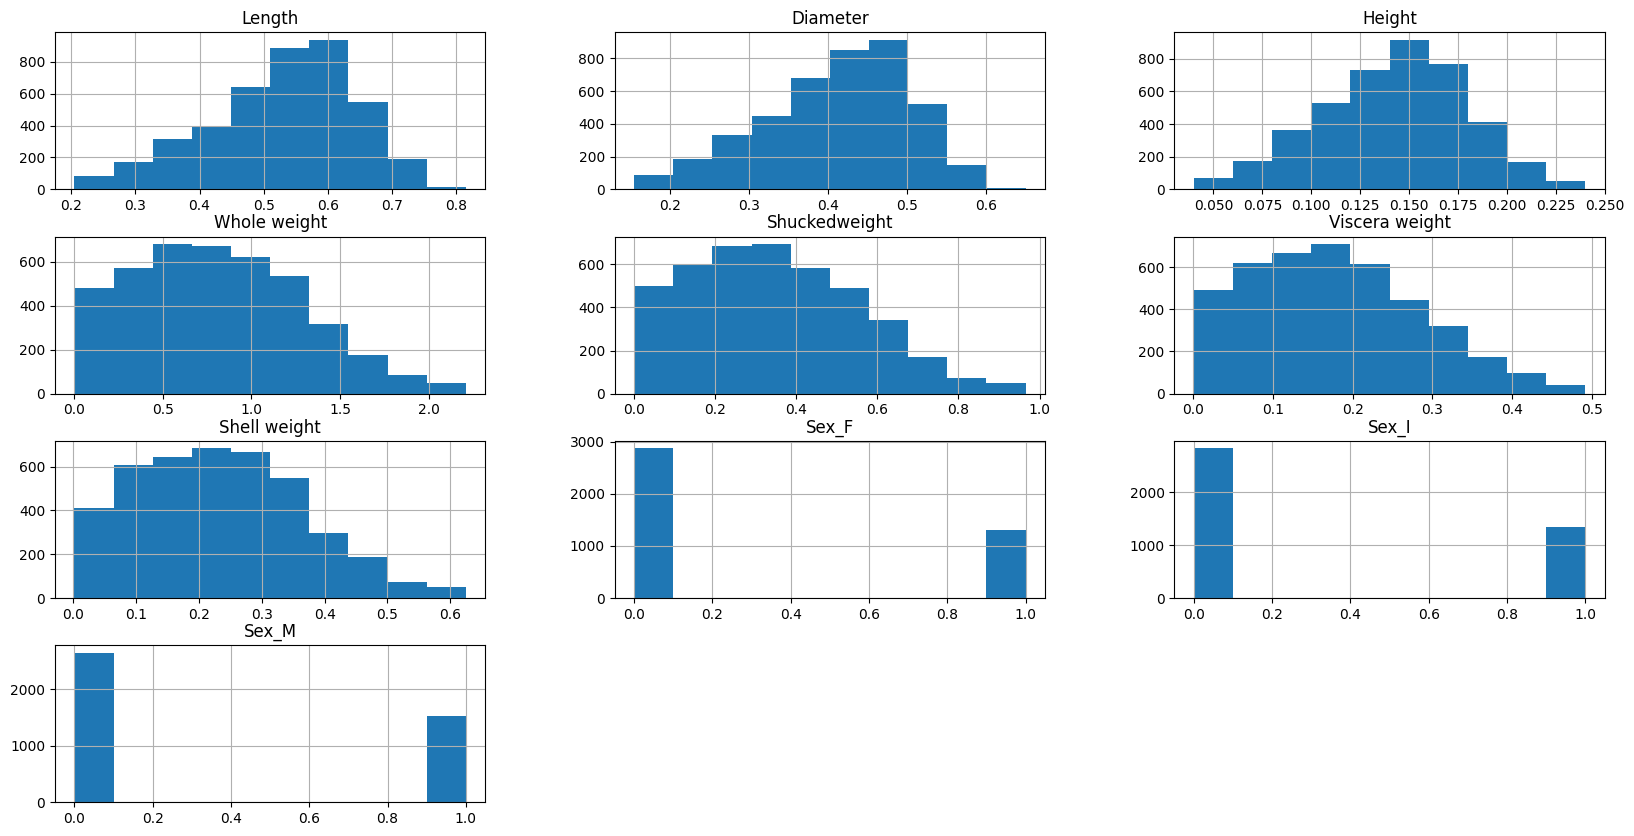

In [27]:
X.hist(figsize = (20, 10))

### Splitting the dataset into training and test sets

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

### Standardizing the dataset features

In [29]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Importing performance metrics for Regression

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

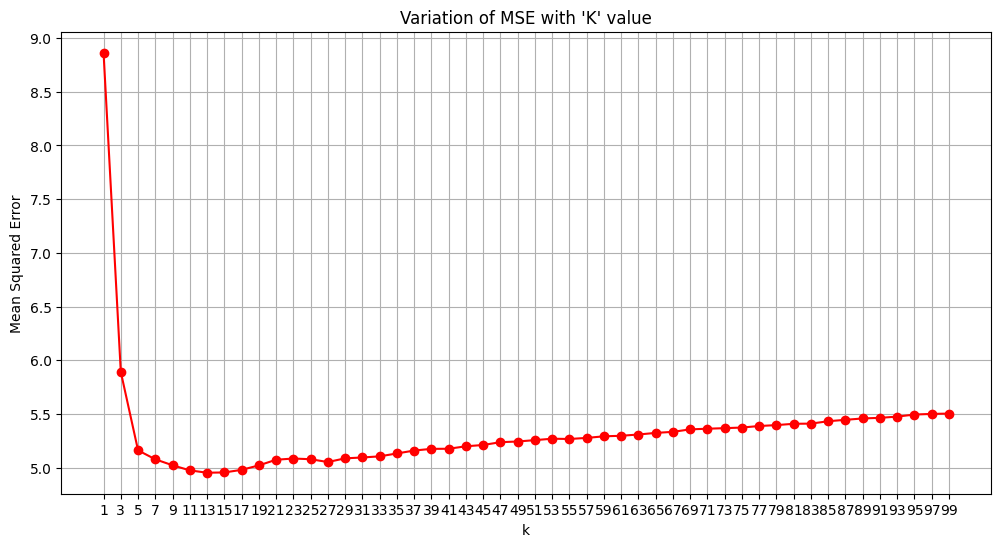

In [31]:
mse_values = []
k_values = []

for k in range(1, 100, 2):
    model = KNeighborsRegressor(n_neighbors = k)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse_values.append(mean_squared_error(y_test, y_pred))
    k_values.append(k)


plt.figure(figsize = (12, 6))

plt.plot(k_values, mse_values, marker = "o", color="red")
plt.title("Variation of MSE with 'K' value")
plt.xlabel("k")
plt.ylabel("Mean Squared Error")
plt.xticks(k_values)
plt.grid()

In [32]:
min_error = min(mse_values)
min_error_index = mse_values.index(min_error)
print('Least MSE of {} - Obtained at the index {}'.format(min_error, min_error_index))

Least MSE of 4.952993025867519 - Obtained at the index 6


In [33]:
best_k = k_values[min_error_index]
print('K value obtained at minimum mse: ', best_k)
knn_regressor = KNeighborsRegressor(n_neighbors=23)
knn_regressor.fit(X_train_scaled, y_train)
y_pred = knn_regressor.predict(X_test_scaled)

K value obtained at minimum mse:  13


In [34]:
y_test

866      9
1483     8
599     16
1702     9
670     14
        ..
162     12
2206     5
3980     7
3075    11
2148     8
Name: Rings, Length: 1254, dtype: int64

In [35]:
y_pred = y_pred.reshape(-1, 1)

In [36]:
mse = mean_squared_error(y_test, y_pred)

In [37]:
print('Mean Squared Error: ', mse)

Mean Squared Error:  5.085171685012497


In [38]:
rmse = np.sqrt(mse)
print('Root Mean Squared Error: ', rmse)

Root Mean Squared Error:  2.255032524158465


### Grid Search CV implementation

In [39]:
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV, StratifiedKFold

### Function to calculate Root Mean Square Error

In [40]:
def rmse(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)

    distance = predict - actual

    square_distance = distance ** 2

    mean_square_distance = square_distance.mean()

    score = np.sqrt(mean_square_distance)

    return abs(score)

### Making our custom function as a scorer

In [41]:
from sklearn.metrics import make_scorer

rmse_score = make_scorer(rmse,greater_is_better=False)

### Model Building

In [42]:
model = KNeighborsRegressor()

# Creating cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True)

# Dictionary of parameters for the kNeighboursModel()
model_params = {
                    "n_neighbors" : range(1, 100, 2),
                    "weights" : ['uniform', 'distance'],
                    "algorithm" : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                    "p" : [1, 2],
                    "metric" : ['euclidean', 'manhattan', 'minkowski']
                 }

# Implementing GridSearchCV
model = GridSearchCV(model, model_params, cv = cv, scoring = rmse_score, n_jobs=-1)
# Fitting the model
model.fit(X_train_scaled, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 100, 2), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring=make_scorer(rmse, greater_is_better=False))

In [43]:
model.best_estimator_

KNeighborsRegressor(metric='manhattan', n_neighbors=15, p=1, weights='distance')

### We need to consider the negation of the best score as sklearn returns us the negative rmse.

In [44]:
model.best_score_

-2.248691192455791

In [45]:
model.cv_results_

{'mean_fit_time': array([0.00131583, 0.00179863, 0.00200958, ..., 0.00064878, 0.00055552,
        0.00057425]),
 'std_fit_time': array([7.09835528e-04, 7.98893166e-04, 8.61179227e-04, ...,
        3.93289206e-05, 1.42125073e-04, 1.56385331e-04]),
 'mean_score_time': array([0.00494118, 0.00922613, 0.00495458, ..., 0.0307066 , 0.01965313,
        0.01665435]),
 'std_score_time': array([0.00229663, 0.00376149, 0.00210143, ..., 0.00249549, 0.00409896,
        0.00179782]),
 'param_algorithm': masked_array(data=['auto', 'auto', 'auto', ..., 'brute', 'brute', 'brute'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_metric': masked_array(data=['euclidean', 'euclidean', 'euclidean', ...,
                    'minkowski', 'minkowski', 'minkowski'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_neighbors': masked_array(data=[1, 1, 1, 

### Evaluating the model with test data

In [46]:
y_pred_gs = model.predict(X_test_scaled)
rmse_gs = rmse(y_pred_gs, y_test)
print('Root Mean Squared Error with GridSearch optimization: ', rmse_gs)

Root Mean Squared Error with GridSearch optimization:  2.2093629909815027


**OBSERVATIONS**
    
    1. The Root Mean Squared Error obtained from optimizing the K and GridSearchCV are as follows:
        - With optimal 'K': 2.2486
        - With GridSearch CV: 2.209
    2. Notice that the GridSearchCV performed better to some extent. 
    3. The best set of hyper-parameters for GridSearch CV include:
        - KNeighborsRegressor(metric='manhattan', n_neighbors=15, p=1, weights='distance')